In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
#Ordinar Least squares method (OLS) --> find values of alpha and beta that minimise the sum of the squared difference between Y and Ye. Beta = Cov(X,Y) / Var (X). Estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable.

#xm & ym son las medias
#Cov(X,Y) = divide(Sumatorio hasta n (xi - xm)(yi-ym) , n )
#Var(X) = (x1 - xm)+(x2 - xm)...(xn - xm)

#    If COV(xi, xj) = 0 then variables are uncorrelated
#    If COV(xi, xj) > 0 then variables positively correlated
#    If COV(xi, xj) > < 0 then variables negatively correlated

#numpy.cov() function

In [44]:
#Generate random data
np.random.seed(0)
X= 2.5*np.random.randn(100)+ 1.5  # Array of 100 values with mean = 1.5, Desv =2,5. Quantitat de dispersió versus la mitjana (Desv, SD o StDev)
Residual = 0.5 * np.random.randn(100) #100 residual terms
y = 2 + 0.3 * X + Residual

In [45]:
#Store our X and Y values and show first values, as well as create columns for cov and var.

df = pd.DataFrame(
    {'X': X,
     'y': y})

df['xycov'] = 0
df['xvar'] = 0

df.head()

,X,y,xycov,xvar
0,5.910131,4.714615,0,0
1,2.500393,2.076238,0,0
2,3.946845,2.548811,0,0
3,7.102233,4.615368,0,0
4,6.168895,3.264107,0,0


In [46]:
# calculate and print x and y means
xmean = np.mean(X)
ymean = np.mean(y)

print('xmean = ' + str(xmean) )
print('ymean = ' + str(ymean) )

xmean = 1.6495200388362121
ymean = 2.5358624970247825


In [47]:
#calculate terms needed for the numerator and denominator of beta. Will calculate in two ways.
#first one
df['xycov'] = (df['X']-xmean) * (df['y']-ymean)
df['xstdev'] = (df['X']-xmean) #varianza es la stdev**2
df['xvar'] = df['xstdev']**2

df.head()

,X,y,xycov,xvar,xstdev
0,5.910131,4.714615,9.282815,18.152805,4.260611
1,2.500393,2.076238,-0.391082,0.723985,0.850873
2,3.946845,2.548811,0.029747,5.277702,2.297325
3,7.102233,4.615368,11.338948,29.732079,5.452713
4,6.168895,3.264107,3.291209,20.424750,4.519375


In [53]:
#Beta = Cov(X,Y) / Var (X)
# Ye = ALPHA + BETA * X
# ALPHA = ym - BETA * xm
count_row = df.shape[0]
covsum = df['xycov'].sum()
cov = covsum
xv = df['xvar'].sum()

beta = cov / xv
alpha = ymean - (beta*xmean)
print('beta = ' + str(beta))
print('alpha = ' + str(alpha))

beta = 0.3229396867092763
alpha = 2.0031670124623426


In [54]:
#we have a model, lets predict
ypred =alpha + beta*X
print(ypred)

[3.91178282 2.81064315 3.27775989 4.29675991 3.99534802 1.69857201
 3.25462968 2.36537842 2.40424288 2.81907292 2.60387001 3.66168312
 3.10199975 2.58581077 2.84592918 2.75696825 3.69382011 2.32194218
 2.74033151 1.79802302 0.42642221 3.015275   3.18547843 1.88839019
 4.32006116 1.31339555 2.52451965 2.33645381 3.72506464 3.67386219
 2.61267323 2.79288576 1.77082341 0.88838207 2.20668994 2.61380476
 3.48085076 3.45831697 2.17486854 2.24351265 1.64102813 1.34112617
 1.11002064 4.06253353 2.07610925 2.1338976  1.47613319 3.11528277
 1.18459738 2.31582084 1.76462232 2.79994197 2.07517841 1.53439407
 2.46482364 2.83338994 2.54127917 2.73177699 1.9754571  2.19471775
 1.94466613 2.19729158 1.83108353 1.09386364 2.6308214  2.16319902
 1.17143718 2.86120343 1.75506992 2.52951462 3.07620724 2.59171079
 3.40747079 1.49064088 2.81240675 1.93469565 1.78453915 2.02024272
 2.23604485 2.53292159 1.54689373 3.2148581  2.86352875 1.24729141
 3.68911579 4.01822118 3.43926331 2.34231437 1.62310525 3.3388

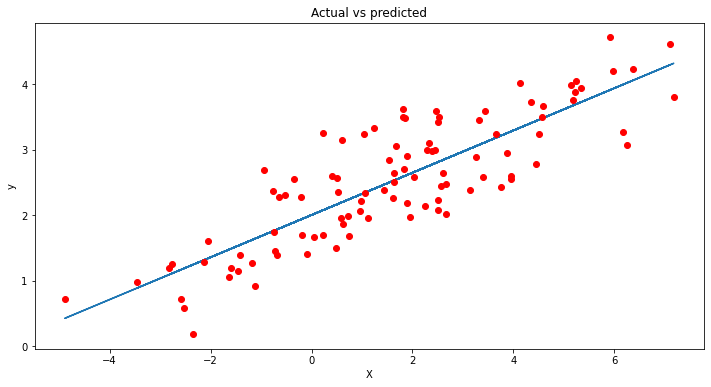

In [55]:
plt.figure(figsize=(12,6))
plt.plot(X, ypred)  #regression line
plt.plot(X,y,'ro')
plt.title('Actual vs predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()